#### Created on: 9/6/2022
#### By: Zilin Chen

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
plt.style.use('seaborn-white')
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")
import statsmodels.api as sm

In [2]:
CROX = pd.read_csv('CROX.csv', parse_dates=['Date'])
CROX.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-02-08,15.000,16.250,14.070,14.275,14.275,23814000
1,2006-02-09,14.620,14.670,13.060,13.500,13.500,4463800
2,2006-02-10,13.500,13.770,13.010,13.275,13.275,1800400
3,2006-02-13,13.250,14.125,13.195,13.850,13.850,1701800
4,2006-02-14,13.875,14.235,13.875,13.900,13.900,2553800


In [3]:
CROX['log_price'] = np.log(CROX['Adj Close'])
CROX.head()

,Date,Open,High,Low,Close,Adj Close,Volume,log_price
0,2006-02-08,15.000,16.250,14.070,14.275,14.275,23814000,2.658510
1,2006-02-09,14.620,14.670,13.060,13.500,13.500,4463800,2.602690
2,2006-02-10,13.500,13.770,13.010,13.275,13.275,1800400,2.585883
3,2006-02-13,13.250,14.125,13.195,13.850,13.850,1701800,2.628285
4,2006-02-14,13.875,14.235,13.875,13.900,13.900,2553800,2.631889


In [4]:
CROX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4173 entries, 0 to 4172
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4173 non-null   datetime64[ns]
 1   Open       4173 non-null   float64       
 2   High       4173 non-null   float64       
 3   Low        4173 non-null   float64       
 4   Close      4173 non-null   float64       
 5   Adj Close  4173 non-null   float64       
 6   Volume     4173 non-null   int64         
 7   log_price  4173 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 260.9 KB


## 1. Exploratory Data Analysis on Stock Price

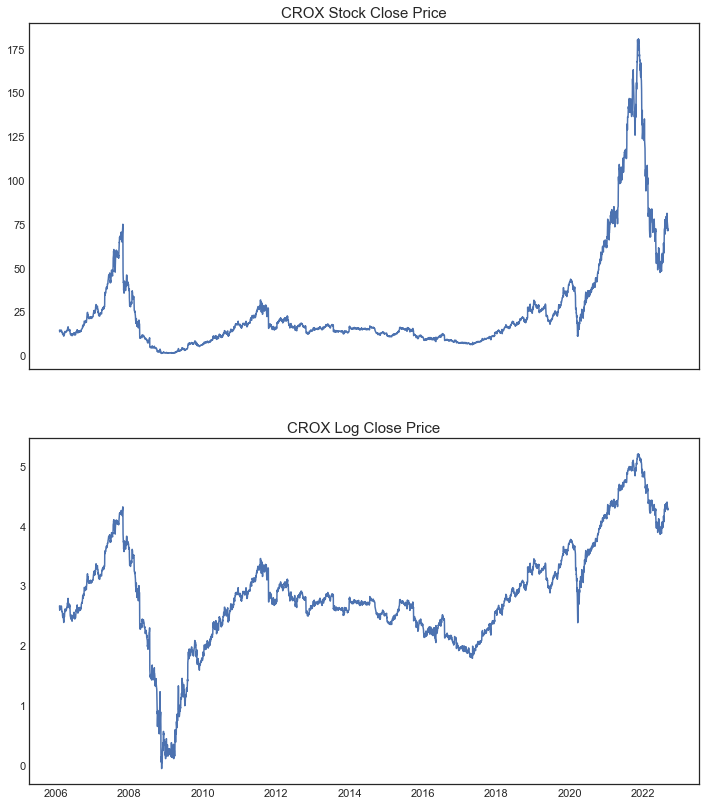

In [5]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12,14))
axes[0].plot(CROX['Date'], CROX['Adj Close'])
axes[0].set_title('CROX Stock Close Price', fontsize=15)
axes[1].plot(CROX['Date'], CROX['log_price'])
axes[1].set_title('CROX Log Close Price', fontsize=15)
plt.show()

### Explore Seasonality

In [6]:
CROX['year'] = [d.year for d in CROX['Date']]
CROX['month'] = [d.strftime('%b') for d in CROX['Date']]
CROX['DayofWeek'] = CROX['Date'].dt.dayofweek + 1
years = CROX['year'].unique()

In [7]:
CROX.head()

,Date,Open,High,Low,Close,Adj Close,Volume,log_price,year,month,DayofWeek
0,2006-02-08,15.000,16.250,14.070,14.275,14.275,23814000,2.658510,2006,Feb,3
1,2006-02-09,14.620,14.670,13.060,13.500,13.500,4463800,2.602690,2006,Feb,4
2,2006-02-10,13.500,13.770,13.010,13.275,13.275,1800400,2.585883,2006,Feb,5
3,2006-02-13,13.250,14.125,13.195,13.850,13.850,1701800,2.628285,2006,Feb,1
4,2006-02-14,13.875,14.235,13.875,13.900,13.900,2553800,2.631889,2006,Feb,2


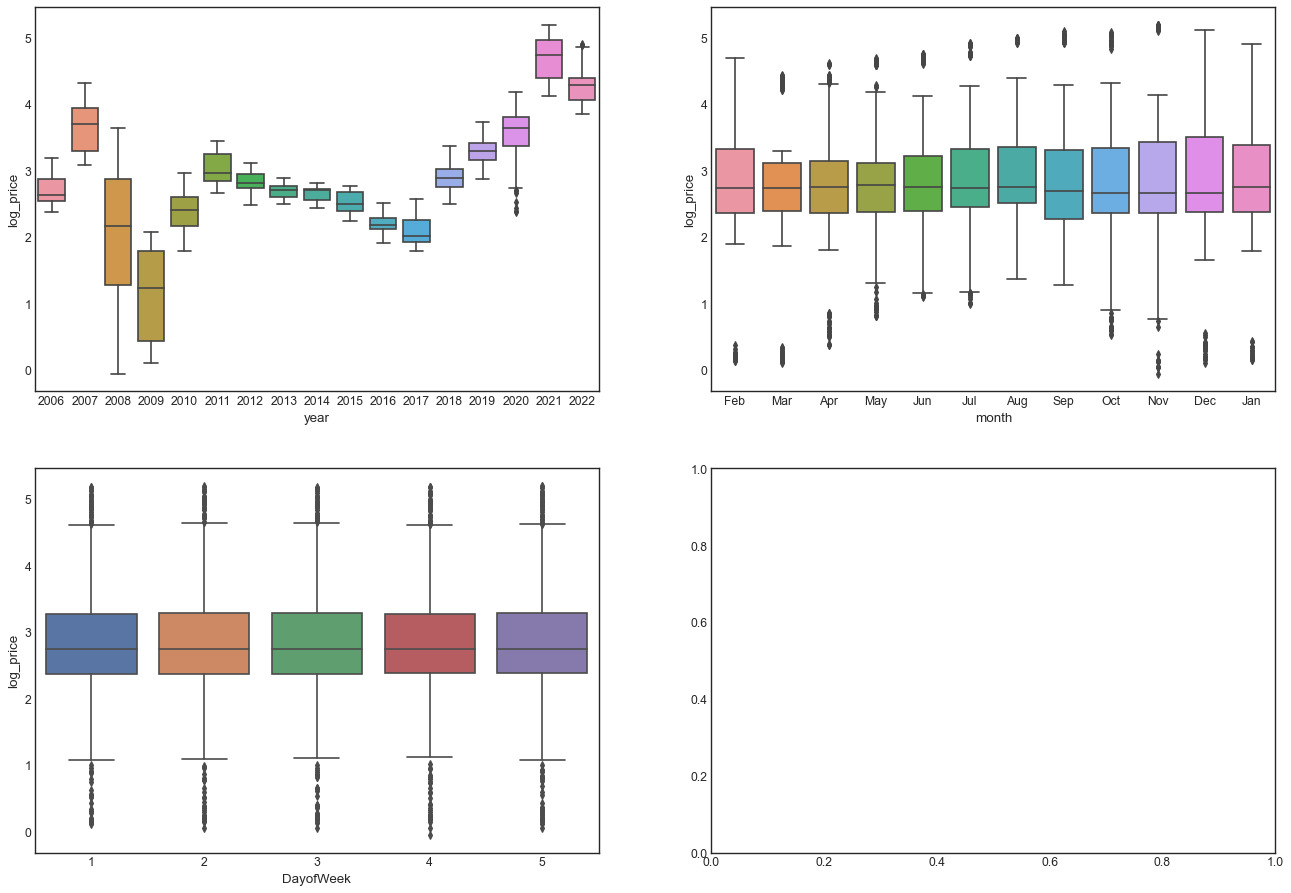

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(20,14), dpi= 80)
sns.boxplot(x='year', y='log_price', data=CROX, ax=axes[0,0])
sns.boxplot(x='month', y='log_price', data=CROX, ax=axes[0,1])
sns.boxplot(x='DayofWeek', y='log_price', data=CROX, ax=axes[1,0])
plt.show()

### Test Stationary and Explore Differencing (d)

In [9]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [10]:
result = adfuller(CROX['log_price'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.3609743166804884
p-value: 0.6008360290219934
Critial Values:
   1%, -3.4319301396383657
Critial Values:
   5%, -2.8622382189793107
Critial Values:
   10%, -2.567141668277847


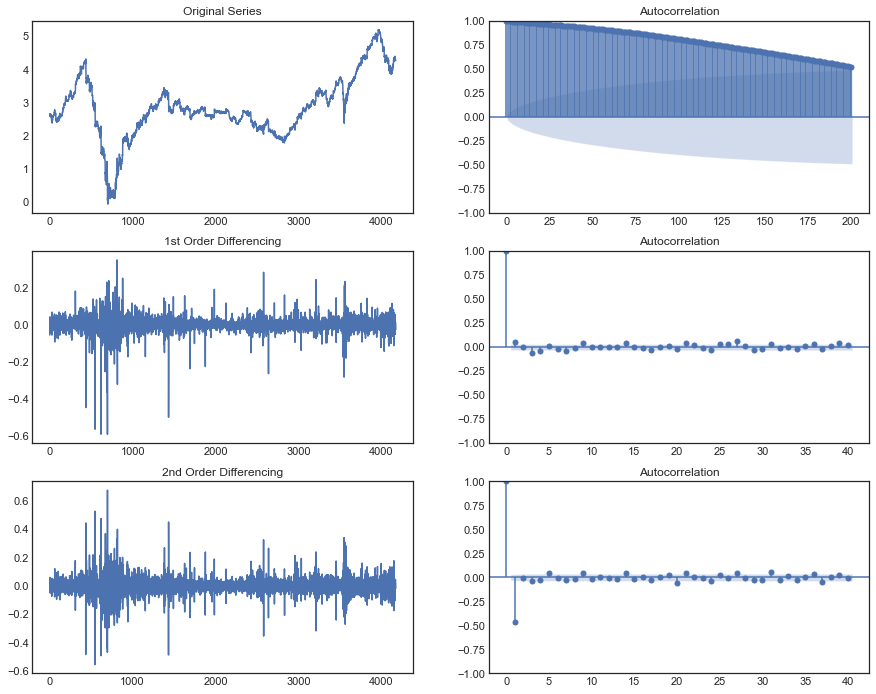

In [11]:
fig, axes = plt.subplots(3, 2, figsize = (15,12))
axes[0, 0].plot(CROX['log_price']); axes[0, 0].set_title('Original Series')
plot_acf(CROX['log_price'], ax=axes[0, 1], lags=200)

# 1st Differencing
axes[1, 0].plot(CROX['log_price'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(CROX['log_price'].diff().dropna(), ax=axes[1, 1], lags=40)

# 2nd Differencing
axes[2, 0].plot(CROX['log_price'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(CROX['log_price'].diff().diff().dropna(), ax=axes[2, 1], lags=40)

plt.show()

In [12]:
result_d1 = adfuller(CROX['log_price'].diff().dropna(), autolag='AIC')
print(f'ADF Statistic for 1st Order Differencing: {result_d1[0]}')
print(f'p-value: {result_d1[1]}')
for key, value in result_d1[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic for 1st Order Differencing: -10.309479456248413
p-value: 3.2134065489558685e-18
Critial Values:
   1%, -3.4319301396383657
Critial Values:
   5%, -2.8622382189793107
Critial Values:
   10%, -2.567141668277847


### Explore AR term(p)

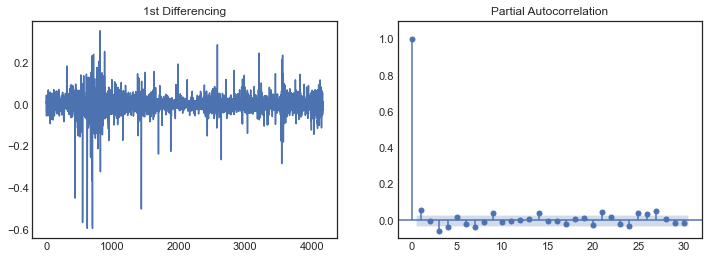

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].plot(CROX['log_price'].diff()); axes[0].set_title('1st Differencing')
plot_pacf(CROX['log_price'].diff().dropna(), lags=30, ax=axes[1])
axes[1].set(ylim=(-0.1,1.1))
plt.show()

### Explore MA term(q)

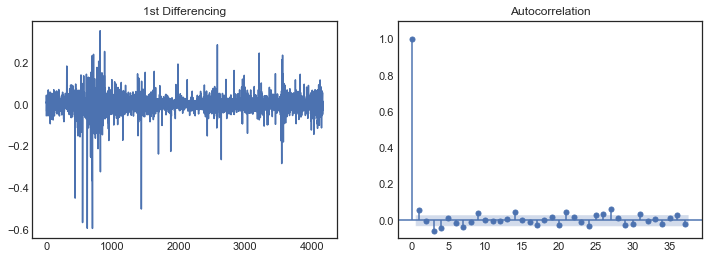

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].plot(CROX['log_price'].diff()); axes[0].set_title('1st Differencing')
plot_acf(CROX['log_price'].diff().dropna(), ax=axes[1])
axes[1].set(ylim=(-0.1,1.1))
plt.show()

## 2. Auto Arima Forecasting

In [15]:
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

In [16]:
data = CROX['log_price'].diff().dropna()
test_size = int(len(data)*0.1)
train, test = pd.DataFrame(data[:-test_size]), pd.DataFrame(data[-test_size:])
len(train), len(test)

(3755, 417)

In [17]:
model = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-12700.456, Time=0.79 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-12693.027, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-12702.489, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-12702.492, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-12700.530, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-12706.496, Time=0.69 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-12730.243, Time=1.24 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-12698.525, Time=0.25 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-12711.200, Time=0.24 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-12713.209, Time=0.52 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-12715.168, Time=0.37 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-12714.782, Time=0.99 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-12726.756, Time=1.73 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-12724.690, Time=2.20 sec

Best

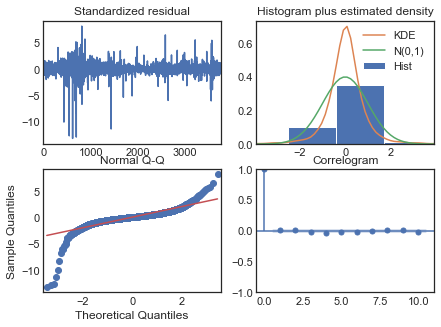

In [18]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

In [19]:
n_periods = len(test)
index_of_fc = np.arange(len(train), len(train)+n_periods)

In [20]:
# predicts = []
# yhat = model.predict(n_periods=1)
# predicts.append(yhat)
# train = train.append(test.iloc[0])
# for i in range(1, n_periods):
#     step_model = ARIMA(train, order=((2,0,2)))
#     step_model_fit = step_model.fit()
#     yhat = step_model_fit.forecast(steps=1)
# #     print (yhat)
#     predicts.append(yhat)
# #     confints.append(cf)
#     train = train.append(test.iloc[i])
#     print ('Step#: ', i)

In [22]:
predicts = model.predict(n_periods=n_periods)
predicts_series = pd.Series(predicts, index=index_of_fc)

/Users/zilinchen/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


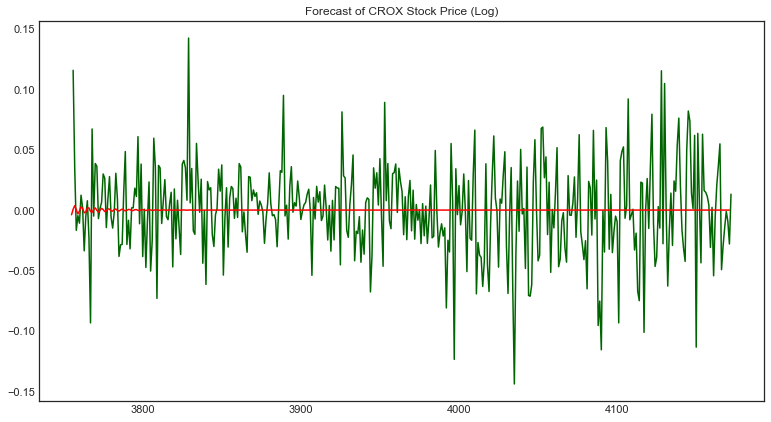

In [23]:
fig = plt.figure(figsize=(13,7))
# plt.plot(train[:-n_periods])
plt.plot(test, color='darkgreen')
plt.plot(predicts_series, color='red')
plt.title("Forecast of CROX Stock Price (Log)")
plt.show()


In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
rms = mean_squared_error(test, predicts_series, squared=False)
rms

0.03763495190570105